In [17]:
mpl.rcParams['pgf.texsystem'] = 'pdflatex'

In [1]:
nbins = 30
var_bins = {
   'pt6bsum' : np.linspace(200, 1000, nbins),
   'dR6bmin' : np.linspace(0, 2, nbins),
   'dEta6bmax' : np.linspace(0.4, 2, nbins),
   'HX_pt' : np.linspace(0, 600, nbins),
   'HY1_pt' : np.linspace(0, 400, nbins),
   'HY2_pt' : np.linspace(0, 400, nbins),
   'HX_dr' : np.linspace(0, 4, nbins),
   'HY1_dr' : np.linspace(0, 5, nbins),
   'HY2_dr' : np.linspace(0, 5, nbins),
   'HX_m' : np.linspace(135, 215, nbins),
   'HY1_m' : np.linspace(135, 215, nbins),
   'HY2_m' : np.linspace(135, 215, nbins),
   'HX_HY1_dEta' : np.linspace(0, 6, nbins),
   'HY1_HY2_dEta' : np.linspace(0, 6, nbins),
   'HY2_HX_dEta' : np.linspace(0, 6, nbins),
   'HX_HY1_dPhi' : np.linspace(0, 3.2, nbins),
   'HY1_HY2_dPhi' : np.linspace(0, 3.2, nbins),
   'HY2_HX_dPhi' : np.linspace(0, 3.2, nbins),
   'HX_costheta' : np.linspace(0, 1, nbins),
   'HY1_costheta' : np.linspace(0,1 , nbins),
   'HY2_costheta' : np.linspace(0, 1, nbins)
}


In [29]:

def producePulls(datTree, variables, pdf):
   V_SRhs_mask = datTree.V_SRhs_mask
   V_SRls_mask = datTree.V_SRls_mask

   fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,8), gridspec_kw={'height_ratios':[4,1]})

   pulls = []
   for var in variables:
      original = datTree.np(var)[V_SRls_mask]
      target = datTree.np(var)[V_SRhs_mask]
      norm = len(target)/sum(datTree.V_SR_weights)

      bins = var_bins[var]

      pull = Ratio([target, original],  bins=bins, axs=axs, labels=['Target','Model'], xlabel=var, weights=[None, datTree.V_SR_weights*norm], pull=True)

      pdf.savefig(bbox_inches='tight')
      fig.clf()
      pulls.append(pull)

   return np.array(pulls)

In [3]:
from configparser import ConfigParser

cfg = 'config/sphereConfig_bias.cfg'

config = ConfigParser()
config.optionxform = str
config.read(cfg)

base = config['file']['base']
data = config['file']['data']
pairing = config['pairing']['scheme']
# pairing_type = pairing.split('_')[0]

variables = config['BDT']['variables']
print(variables)
variables = variables.split(', ')

score = float(config['score']['threshold'])


cfg = 'config/sphereConfig_bias.cfg'

config = ConfigParser()
config.optionxform = str
config.read(cfg)

base = config['file']['base']
data = config['file']['data']

indir = f"root://cmseos.fnal.gov/{base}"
datFileName = f"{indir}{data}"
datTree = Signal(datFileName)
region_type = 'sphere'

variables = config['BDT']['variables']
variables = variables.split(', ')


pt6bsum, dR6bmin, dEta6bmax, HX_pt, HY1_pt, HY2_pt, HX_dr, HY1_dr, HY2_dr, HX_m, HY1_m, HY2_m, HX_HY1_dEta, HY1_HY2_dEta, HY2_HX_dEta, HX_HY1_dPhi, HY1_HY2_dPhi, HY2_HX_dPhi, HX_costheta, HY1_costheta, HY2_costheta


SystemExit: 

/uscms/home/srosenzw/nobackup/miniconda3/envs/work/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 576x576 with 0 Axes>

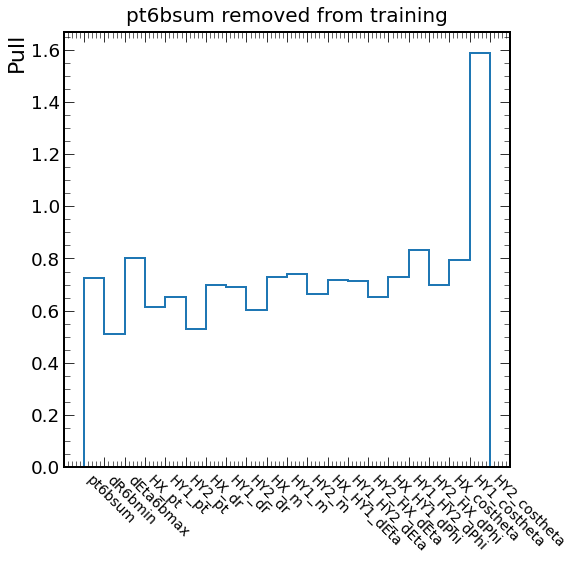

In [30]:
from matplotlib.backends.backend_pgf import PdfPages

var_pulls = {}
for var in variables:
   tvars = variables.copy()
   tvars.remove(var)
   tvars = ", ".join(tvars) # updated training variables
   config['BDT']['variables'] = tvars
   # datTree.spherical_region(config)
   # datTree.bdt_process(region_type, config)

   # try: mkdir(f"plots/{var}")
   # except: pass

   pdf_name = f"plots/{var}_pull.pdf"
   with PdfPages(pdf_name) as pdf:
      pulls = producePulls(datTree, variables, pdf)
      var_pulls[var] = pulls

   x = np.arange(len(variables))
   fig, ax = plt.subplots()
   Hist(x, weights=pulls, bins=np.arange(len(variables)), ax=ax)
   ax.set_title(f"{var} removed from training", fontsize=20)
   ax.set_ylabel("Pull")
   ax.set_xticks(ticks=x, labels=variables, rotation=-45, fontsize=14, ha='left')
   sys.exit()
